In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

# Carregando os dados

In [3]:
df = pd.read_csv("../dados/exemplo_01.csv")

X = df[['x_0', 'x_1']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

# Criando o modelo de árvore de decisão

In [152]:
model = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)

print(f"Accuracy score (train) = {accuracy_train:.2f}, Accuracy score (test) = {accuracy_test:.2f}")

Accuracy score (train) = 1.00, Accuracy score (test) = 1.00


# Verificação do modelo

## Matriz de confusão

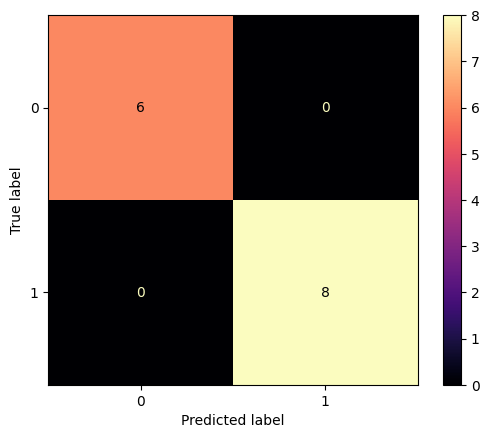

In [141]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=plt.cm.magma)

## Bordas de decisão

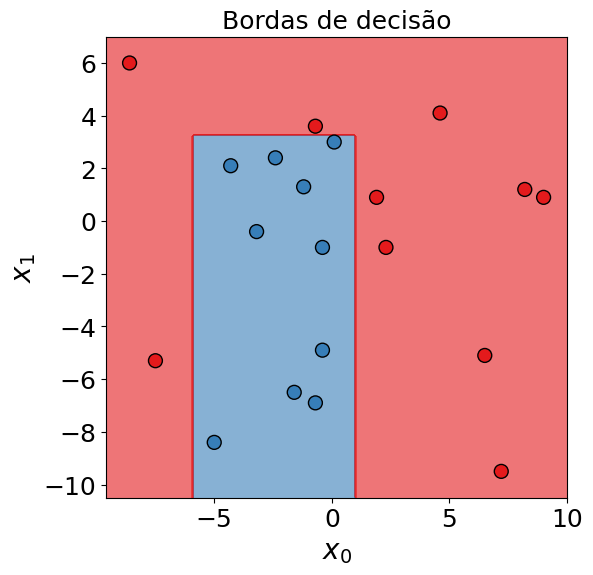

In [137]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['#377eb8', '#e41a1c'])

boundary = DecisionBoundaryDisplay.from_estimator(model, X, grid_resolution=200, cmap=color_map, alpha=0.6)

boundary.ax_.set_box_aspect(aspect=1)

boundary.ax_.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolor="black", cmap=color_map, s=100)


boundary.ax_.set_xlabel("$x_0$", fontsize=20)
boundary.ax_.set_ylabel("$x_1$", fontsize=20)
boundary.ax_.tick_params(axis='both', which='major', labelsize=18)
boundary.ax_.set_title("Bordas de decisão", fontsize=18)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.tight_layout()
plt.show()


## Plot da árvore de decisão

### Com o sklearn

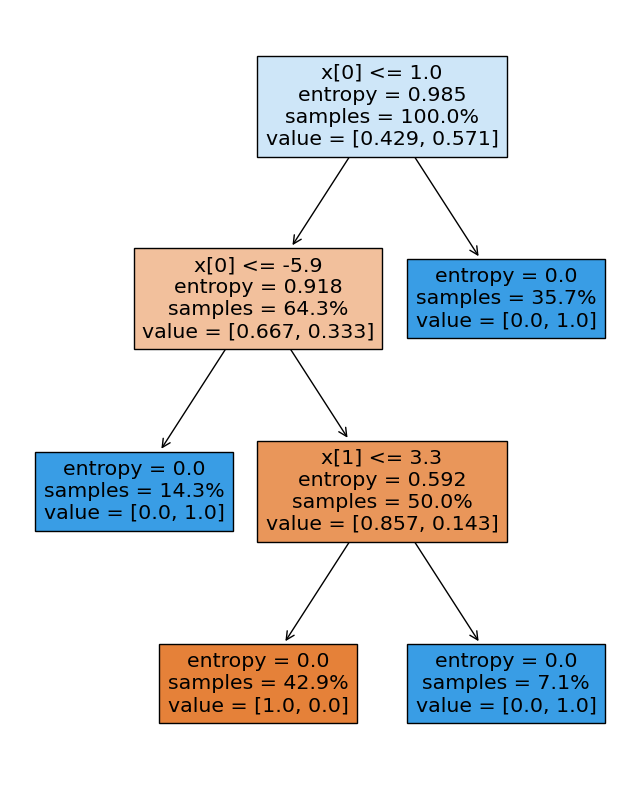

In [153]:

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(8,10))
plot_tree(model, filled=True, proportion=True)
plt.show()

### Com o dtreeviz

/Users/leseixas/intelligible/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


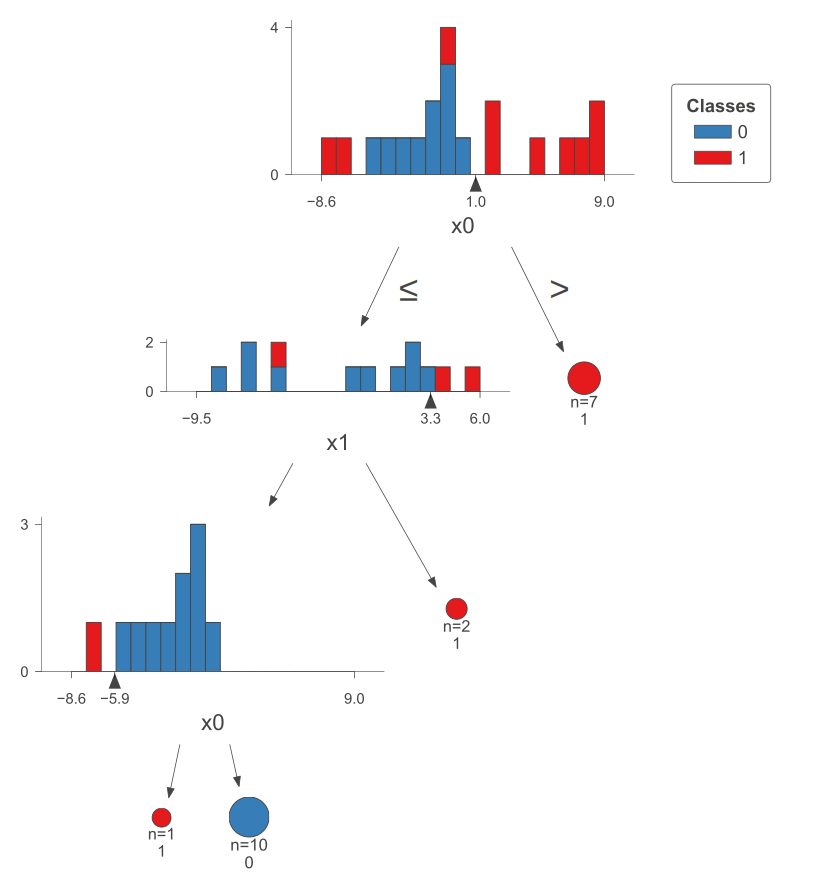

In [8]:
import dtreeviz

viz_model = dtreeviz.model(model, X.values, y.values, target_name='Classes', class_names=['0', '1'], feature_names=['x0', 'x1'])
viz_model.view(scale=2.5, colors={'classes': [None, None, ['#377eb8', '#e41a1c']]})